# Milestone 1
## Introduction
Nama : Vania Alya Qonita <br>
Batch : RMT 029 <br>
<br>
Tujuan : Creating an analysis to Spotify data to give  insight to production users. Mencakup problem identification, data loading, data cleaning, data analysis, and conclusion <br>
Link Data Visualization : https://public.tableau.com/views/Milestone1-Spotify/DatViz?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

In [1]:
# Installing spotipy for Spotify API data
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 10.8 MB/s eta 0:00:00


In [2]:
# Importing relevant libraries
import pandas as pd
import spotipy
import time
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.display import display, HTML

## Problem Identification
In this process, we will assess the problem statement using SMART framework then break it down to questions to be analysed. <br>

**Topic** : Music
### Background
A song company has seen no progress in their song releases (charts and popularity) and artists (followers). So the head has appointed a data analyst to help figure out the features and trends that affect a song popularity. Also, find out top artists for us to figure out their tactics.

### Defining Problem Statements
Using SMART framework : <br>
1.   **Specific**: Enhancing song quality and artists popularity especially through music streaming sites.
2.   **Measurable** : Achieve an increase in track popularity and artist followers by 20%.
3. **Achievable** : By finding out the metrics that interest the users and tuning upcoming songs with relevant features.
4. **Relevant** : Increasing the quality of songs and artist popularity can lead to achieving revenue (from album sales).
5. **Time-Bound** : Achieve within the next quarter.
*Track Popularity : calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.


**Problem statement** <br>
A song company has seen no progress in their song releases (be it through the charts or the artists followers). The goal is to figure out and enhance the quality of music to increase song popularity (track popularity) and gain followers for artists by 20% by the next quarter. <br>
<br>

### Breaking Down The Problem
Main problem : Improving song quality from the track popularity as a metric of user favorability.
- Tracks :
1. How do audio features of tracks correlate with popularity?
2. What is the trend of these factors through the years?
3. What are the popular tracks?
4. What are the varience of subgenres is there?
5. How does the audio feature vary accross genres?
6. How does the popularity of tracks within an album vary? Are the singles always the most popular tracks?
7. How many songs are released per year?

- External:
1. Does the availability of regions affect track popularity?

- Artist : <br>
1. Who is the popular artists?
2. What are the common characteristics of popular vs non popular artist?
3. How many songs are released per artist?

## Data Loading
Data Source : <br>
**A. Song and playlist spotify Data** : [link dataset kaggle](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs) <br>
**B. Artists spotify Data** : The data is acquired through API Spotify using def function  grab_artist. Data is then exported to csv to not repeat extraction. File is named spotify_artist_data.<br>
**C. Album spotify Data** : The data is acquired through API Spotify using def function grab_album. Data is then exported to csv to not repeat extraction. File is named spotify_albums_3_data.

In [3]:
# Get the spotify songs data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
# Since the data has 30000 rows, we will slice it to 5000 rows using iloc
df_spotify = df.iloc[:5000]

In [5]:
# Export the df_spotify data
df_spotify.to_csv('spotify_songs_data.csv', index=False)

### Spotify API
Other than these album data, I wanted to grab the data for artists and it's albums. These data's can be accessed from Spotify API.

In [6]:
# Check out the unique artists from the songs dataset
# This is to find out the values that i need to look for
list_artist = df_spotify['track_artist'].unique().tolist()
print("There are", len(list_artist), "artists, which are", list_artist)

There are 2320 artists, which are ['Ed Sheeran', 'Maroon 5', 'Zara Larsson', 'The Chainsmokers', 'Lewis Capaldi', 'Katy Perry', 'Sam Feldt', 'Avicii', 'Shawn Mendes', 'Ellie Goulding', 'Loud Luxury', 'Martin Garrix', 'AJ Mitchell', 'David Guetta', 'Sam Smith', 'Steve Aoki', 'R3HAB', 'Marshmello', 'Ava Max', 'Nikki Vianna', 'Charlie Puth', 'Starley', 'James Arthur', 'MAX', 'ILLENIUM', 'Bazzi vs.', 'Charli XCX', 'Kygo', 'Armin van Buuren', 'Billie Eilish', 'Sia', 'Sean Paul', 'Estelle', 'Bastille', 'for KING & COUNTRY', 'Lil Nas X', 'Calvin Harris', "Why Don't We", 'Olympis', 'DJ Snake', 'Smash Mouth', 'SHAED', 'Kaskade', 'GASHI', 'Khalid', 'Herve Pagez', 'Mark Ronson', 'Arlissa', '5 Seconds of Summer', 'Gryffin', 'NOTD', 'Jonas Blue', '3LAU', 'Jax Jones', 'Zedd', 'Mabel', 'A R I Z O N A', 'Alesso', 'ayokay', 'ARTY', 'Maggie Lindemann', 'Cashae', 'Galantis', 'Carly Rae Jepsen', 'Tiësto', 'Silk City', 'Shallou', 'benny blanco', 'DVBBS', 'Lost Kings', 'Elderbrook', 'FANNYPACK', 'Joel Corry

In [7]:
# Loading the connection
from spotipy.oauth2 import SpotifyClientCredentials
client_id = "149db0b44c4b49188c8b592e5fb0c4b2"
client_secret = "0580f1e219c94c80848843a09a6f64ac"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [8]:
# Creating a function to grab the artist data
def grab_artist(searchQuery):
    searchResults = sp.search(searchQuery,1,0,"artist")

    artist = searchResults['artists']['items'][0]
    artistID = artist['id']
    artist_name= artist['name']
    # artists_searched.add(artist_name)


    print(artist['name'])
    print()


    ## Extract artist data and fill database
    new_row = {'artist_id': artist['id'],
                'artist_name':artist['name'],
                'genres':artist['genres'],
                'folowers':artist['followers']['total'],
                'popularity':artist['popularity']}
    # df_artists = df_artists.append(new_row, ignore_index=True)
    return new_row, artistID

In [9]:
def grab_album(artistID):
    albumResults = sp.artist_albums(artistID, limit=50)
    albumResults = albumResults['items']
    z = 0

    # Loop over album
    list_album = []
    for album in albumResults:
        time.sleep(1)
        ## Extract album data and fill database
        albumID = album['id']
        album_name =  album['name']
        album_genre = album.get("genres", "no_genres")

        new_album = {'artist_name':album['artists'][0]['name'],
                    'artist_id':album['artists'][0]['id'],
                    'album_id': album['id'],
                    'album_name':album['name'],
                    'release_date':album['release_date'],
                    'total_tracks':album['total_tracks'],
                    'available_markets':album['available_markets'],
                    'type':album['album_type'],
                    'album_genres':album_genre}
        # df_albums = df_albums.append(new_album, ignore_index=True)

        # df_albums= df_albums.astype({'total_tracks':int})

        print("ALBUM: " + album['name'])
        list_album.append(new_album)
    return list_album

In [10]:
# # Create dataframes
# df_artists = pd.DataFrame()
# df_albums = pd.DataFrame()

# # Create the iteration through the artist name list
# for artist in list_artist:
#     time.sleep(5)
#     artist_row, artistID = grab_artist(artist)
#     df_artists = df_artists.append(artist_row, ignore_index=True)
#     for album in grab_album(artistID):
#         df_albums = df_albums.append(album, ignore_index=True)

The data is already pre scraped and saved in their own csv. Thus, below is the loading of the data from the csv.

In [12]:
# Getting the artist data
df_artists = pd.read_csv('spotify_artist_data.csv')
df_artists.head()

,artist_id,artist_name,genres,folowers,popularity
0,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87
1,04gDigrS5kc9YWfZHwBETP,Maroon 5,['pop'],40847209,85
2,1Xylc3o4UrD53lo9CvFvVg,Zara Larsson,"['pop', 'scandipop', 'swedish electropop', 'sw...",10294908,78
3,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,['pop'],19876086,79
4,4GNC7GD6oZMSxPGyXy4MNB,Lewis Capaldi,"['pop', 'uk pop']",12259414,81


In [13]:
# Getting the album data
df_albums = pd.read_csv('spotify_albums_3_data.csv')
df_albums.head()

,artist_name,artist_id,album_id,album_name,release_date,total_tracks,available_markets,type,album_genres
0,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
1,Maroon 5,04gDigrS5kc9YWfZHwBETP,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
2,Zara Larsson,1Xylc3o4UrD53lo9CvFvVg,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
3,The Chainsmokers,69GGBxA162lTqCwzJG5jLp,1nqYsOef1yKKuGOVchbsk6,Call You Mine (Remixes),2019-07-19,6,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
4,Lewis Capaldi,4GNC7GD6oZMSxPGyXy4MNB,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,2,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres


### Data Merging
There are 3 datasets that we are working with, we will need to merge the 3 dataset to properly use 1 central dataset.

In [14]:
# Dropping the playlist attributes from df_spotify
playlist_attr = ['playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']
df_tracks = df_spotify.drop(playlist_attr, axis='columns')

# Checking the df_tracks
df_tracks.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [15]:
# Data merging between df_tracks, df_artists, and df_albums
df_merge = pd.merge(df_tracks, df_artists, how="inner", left_on="track_artist", right_on="artist_name")
df_merge = pd.merge(df_merge, df_albums, left_on="track_album_id", right_on="album_id")
# Drop redundant columns after merging
df_merge = df_merge.drop(columns=['track_id','artist_id_x', 'artist_name_x','artist_name_y','artist_id_y','album_id','album_name','release_date'])
# Show the table
df_merge

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,danceability,energy,key,loudness,...,valence,tempo,duration_ms,genres,folowers,popularity,total_tracks,available_markets,type,album_genres
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,0.748,0.916,6,-2.634,...,0.518,122.036,194754,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
1,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,0.675,0.919,8,-5.385,...,0.585,124.982,163049,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
2,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Ed Sheeran,58,49bXZtlI5kQSqQMSCnSaWO,Cross Me (feat. Chance the Rapper & PnB Rock) ...,2019-06-21,0.679,0.923,6,-6.500,...,0.752,121.984,207894,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
3,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,66,1imXAvLuowvPYIsFMYUPY0,South of the Border (feat. Camila Cabello & Ca...,2019-12-11,0.805,0.835,0,-4.603,...,0.722,125.028,188230,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
4,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,65,05Bru0ZVTxp4orAyrZIA77,South of the Border (feat. Camila Cabello & Ca...,2019-10-04,0.789,0.858,5,-4.388,...,0.491,110.012,173455,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,Sweet Lies (Featuring Sam Gray),SOLANO,25,1mvvsnswange9c5FP9Co3W,Sweet Lies (Featuring Sam Gray),2017-08-11,0.637,0.680,0,-6.229,...,0.528,140.042,206120,[],4919,23,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
1500,Deixe-Me Ir - LIVA Remix,1Kilo,61,0SlUU2CJaYGXHUP3Dwr057,Deixe-Me Ir (LIVA Remix),2018-01-29,0.739,0.722,9,-5.850,...,0.492,121.978,285261,['pop rap brasileiro'],4402320,59,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres
1501,Fast Car,Tracy Chapman,77,6hmmX5UP4rIvOpGSaPerV8,Tracy Chapman,1988-01-01,0.711,0.292,4,-15.523,...,0.194,103.951,296800,"['folk', 'lilith', 'singer-songwriter', ""women...",1677953,73,11,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",album,no_genres
1502,"I Think I Kinda, You Know - Instrumental",Alan Zachary,33,4GgojLZOPRu8MdUVmjNRSI,High School Musical: The Musical: The Series (...,2020-01-10,0.830,0.349,0,-14.625,...,0.327,128.975,172446,[],3269,23,41,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",compilation,no_genres


## Data Understanding
In data understanding, we see the column attributes, the summary of the data, the shape, etc. to get a better understanding of the data.

In [16]:
# See the available columns
df_merge.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'genres', 'folowers', 'popularity', 'total_tracks', 'available_markets',
       'type', 'album_genres'],
      dtype='object')

In [17]:
# See the summary of the data with describe()
df_merge.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,folowers,popularity,total_tracks
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1.504000e+03,1504.000000,1504.000000
mean,65.821809,0.652623,0.729067,5.255319,-5.493606,0.572473,0.078880,0.138924,0.025064,0.175907,0.529180,121.430822,212149.337101,1.528664e+07,69.121011,8.817819
std,16.555683,0.126366,0.149036,3.674367,2.082180,0.494884,0.067821,0.179133,0.120184,0.140422,0.213444,24.395954,38668.308678,2.347929e+07,16.888897,7.895360
min,1.000000,0.204000,0.069200,0.000000,-25.361000,0.000000,0.024200,0.000026,0.000000,0.018500,0.035000,62.520000,95013.000000,2.010000e+02,1.000000,1.000000
25%,56.000000,0.577000,0.637000,1.000000,-6.471000,0.000000,0.039300,0.018000,0.000000,0.089675,0.373500,103.963250,189246.750000,7.704675e+05,60.000000,1.000000
50%,70.000000,0.668000,0.750000,5.000000,-5.202500,1.000000,0.054250,0.067500,0.000001,0.120000,0.519000,121.956000,208006.000000,5.446239e+06,73.000000,10.000000
75%,78.000000,0.738250,0.840000,8.000000,-4.128750,1.000000,0.087925,0.193000,0.000093,0.220250,0.687000,129.992000,228222.000000,2.206946e+07,81.000000,14.000000
max,98.000000,0.979000,0.999000,11.000000,-0.755000,1.000000,0.463000,0.953000,0.950000,0.916000,0.975000,205.749000,484147.000000,1.130258e+08,100.000000,60.000000


In [18]:
# See the shape of the data
df_merge.shape

(1504, 25)

After the merging, the data consists of 1504 data with 25 rows.

In [19]:
# See the types of data with info()
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 0 to 1503
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                1504 non-null   object 
 1   track_artist              1504 non-null   object 
 2   track_popularity          1504 non-null   int64  
 3   track_album_id            1504 non-null   object 
 4   track_album_name          1504 non-null   object 
 5   track_album_release_date  1504 non-null   object 
 6   danceability              1504 non-null   float64
 7   energy                    1504 non-null   float64
 8   key                       1504 non-null   int64  
 9   loudness                  1504 non-null   float64
 10  mode                      1504 non-null   int64  
 11  speechiness               1504 non-null   float64
 12  acousticness              1504 non-null   float64
 13  instrumentalness          1504 non-null   float64
 14  liveness

Our data consists of 25 columns and 1504 rows. Which already satisfied the requirement for analysis. <br>

From the data, we can see that most of the data types is already in the correct type. However, we can change a few as follows : <br>
- track_album_release_date : from string to date
- duration_ms : divide by 60000 to get the minute lapse (as songs is usually captured in minutes). Then change to float.

In [20]:
# Checking for missing values
df_merge.isnull().sum()

track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
genres                      0
folowers                    0
popularity                  0
total_tracks                0
available_markets           0
type                        0
album_genres                0
dtype: int64

From data we can see that the data is free from missing value.

In [21]:
# Checking for duplicated values
df_merge.duplicated().value_counts()

False    1219
True      285
dtype: int64

This shows that there are 285 duplication found. We will need to delete these duplications in the preparation phase.

## Data Preparation & Cleaning
In this section we will do preparations such as handling duplications, changing the data types, and also curating the columns that are going to be used for analysis.

### Handling Duplications

In [22]:
# Dropping data with missing values
df_merge = df_merge.drop_duplicates()

In [23]:
# Checking for the handling result
df_merge.duplicated().value_counts()

False    1219
dtype: int64

Data is clean from duplicated values.

### Changing data type

#### Track Release Date to datetime

In [24]:
# Converting the 'track_album_release_date' column to datetime format
df_merge['track_album_release_date'] = pd.to_datetime(df_merge['track_album_release_date'])

<ipython-input-24-b59b7a3fc222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['track_album_release_date'] = pd.to_datetime(df_merge['track_album_release_date'])


In [25]:
# Checking the format
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1503
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_name                1219 non-null   object        
 1   track_artist              1219 non-null   object        
 2   track_popularity          1219 non-null   int64         
 3   track_album_id            1219 non-null   object        
 4   track_album_name          1219 non-null   object        
 5   track_album_release_date  1219 non-null   datetime64[ns]
 6   danceability              1219 non-null   float64       
 7   energy                    1219 non-null   float64       
 8   key                       1219 non-null   int64         
 9   loudness                  1219 non-null   float64       
 10  mode                      1219 non-null   int64         
 11  speechiness               1219 non-null   float64       
 12  acousticness        

Data is successfully changed to datetime type.

#### Creating duration in minutes

In [26]:
# Creating the duration in minutes column by dividing ms by 60000
df_merge['duration_m'] = df_merge['duration_ms'] / 60000

<ipython-input-26-a16209a2c183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['duration_m'] = df_merge['duration_ms'] / 60000


In [27]:
# Checking the new column dtype
df_merge['duration_m'].dtypes

dtype('float64')

As the new duration_m data is in float, then the data type is already correct.

## Modeling/Exploratory Data Analysis

### Tracks

#### 1. How do audio features of tracks (such as tempo, valence, energy) correlate with their popularity?

To answer this question, we will perform chi-squared test since we want to test the relation between two categorical data.

To perform the test, we need to define the hypothesis:

𝐻0 : A feature and track popularity are independent

𝐻1 : A feature and track popularity are dependent

We will use confidence level of 95%.

In [28]:
cols = df_merge.drop(columns=['track_popularity','folowers', 'popularity', 'duration_m'])
cols = cols.select_dtypes('number').columns

for col in cols:
  cross = pd.crosstab(df_merge[col],df_merge['track_popularity'])
  pval = stats.chi2_contingency(cross).pvalue
  prompt = "and they are dependent" if pval<0.05 else ""
  print(f"P-value of {col} and Track Popularity: {pval} {prompt}")

P-value of danceability and Track Popularity: 1.5178219026401843e-05 and they are dependent
P-value of energy and Track Popularity: 6.292110186068342e-27 and they are dependent
P-value of key and Track Popularity: 0.7891810390683079 
P-value of loudness and Track Popularity: 0.14008401980205315 
P-value of mode and Track Popularity: 0.15616723417775327 
P-value of speechiness and Track Popularity: 0.010783940962541948 and they are dependent
P-value of acousticness and Track Popularity: 0.0043567888171075556 and they are dependent
P-value of instrumentalness and Track Popularity: 5.8265230907178225e-09 and they are dependent
P-value of liveness and Track Popularity: 0.1562214430812368 
P-value of valence and Track Popularity: 0.9999999997960746 
P-value of tempo and Track Popularity: 0.8157191895612083 
P-value of duration_ms and Track Popularity: 0.11226251150950207 
P-value of total_tracks and Track Popularity: 0.9999340803852441 


Based on this, the factors that relate to track popularity are danceability, energy, speechiness, acousticness, and instrumentalness.

#### 2. How is the trend of these factors through the years?

<ipython-input-29-76ae9fe2c83a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['year_release'] = df_merge['track_album_release_date'].dt.year


Text(0.5, 0, 'Year')

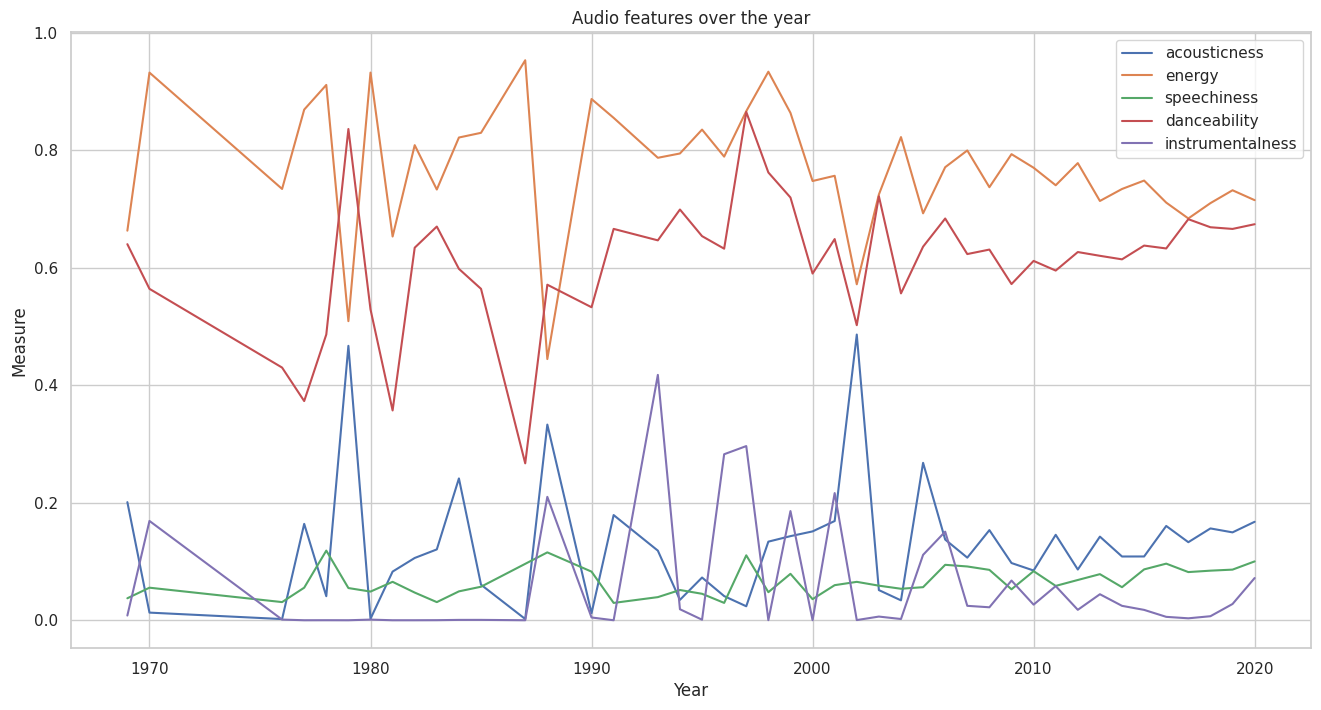

In [29]:
# Creating a year column
df_merge['year_release'] = df_merge['track_album_release_date'].dt.year

# Creating the figure
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","energy","speechiness","danceability","instrumentalness"]
for col in columns:
    year = df_merge.groupby("year_release")[col].mean()
    ax= sns.lineplot(x=year.index,y=year,label=col)
ax.set_title('Audio features over the year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

**Insight**

From the data we can see that the audio features has gone more stable throughout the years. A couple of details :

- Acousticness is having an up trend
- Energy is having an down trend
- Speechiness is having an up trend
- Danceability is having an up trend
- Instrumentalness is having an up trend

#### 3. What are the popular tracks?

In [30]:
# Filtering the top 10 popular tracks by track popularity
popular_tracks = df_merge.sort_values(by='track_popularity', ascending=False).iloc[:10]
# Showing the list
popular_tracks

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,danceability,energy,key,loudness,...,duration_ms,genres,folowers,popularity,total_tracks,available_markets,type,album_genres,duration_m,year_release
783,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,0.695,0.762,0,-3.497,...,215280,"['dfw rap', 'melodic rap', 'pop', 'rap']",43021565,87,17,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",album,no_genres,3.588000,2019
737,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,0.803,0.715,2,-3.280,...,200960,"['reggaeton', 'reggaeton colombiano', 'trap la...",44099292,90,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,3.349333,2019
504,Don't Start Now,Dua Lipa,97,0ix3XtPV1LwmZADsprKxcp,Don't Start Now,2019-10-31,0.794,0.793,11,-4.521,...,183290,"['dance pop', 'pop', 'uk pop']",42583613,88,1,"['AR', 'AU', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL...",single,no_genres,3.054833,2019
262,everything i wanted,Billie Eilish,97,4i3rAwPw7Ln2YrKDusaWyT,everything i wanted,2019-11-13,0.704,0.225,6,-14.454,...,245426,"['art pop', 'pop']",91951445,88,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,4.090433,2019
449,Yummy,Justin Bieber,95,1SN6N3fNkZk5oXQ9X46QZ3,Yummy,2020-01-03,0.662,0.519,9,-6.554,...,210427,"['canadian pop', 'pop']",73714491,89,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,3.507117,2020
260,bad guy,Billie Eilish,95,0S0KGZnfBGSIssfF54WSJh,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0.701,0.425,7,-10.965,...,194088,"['art pop', 'pop']",91951445,88,14,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",album,no_genres,3.234800,2019
1033,HIGHEST IN THE ROOM,Travis Scott,94,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,0.598,0.427,7,-8.764,...,175721,"['hip hop', 'rap', 'slap house']",27602217,93,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,2.928683,2019
61,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,0.501,0.405,1,-5.679,...,182161,"['pop', 'uk pop']",12259414,81,12,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",album,no_genres,3.036017,2019
953,My Oh My (feat. DaBaby),Camila Cabello,94,3Vsbl0diFGw8HNSjG8ue9m,Romance,2019-12-06,0.724,0.491,8,-6.024,...,170746,"['dance pop', 'pop']",32234530,79,14,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",album,no_genres,2.845767,2019
724,Ride It,Regard,94,4zOhjJfe0dwqsNdDYk622E,Ride It,2019-07-26,0.880,0.751,7,-4.258,...,157606,"['pop dance', 'pop edm', 'slap house', 'uk dan...",240168,67,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,2.626767,2019


The most popular tracks is Circles by Post Malone and Tusa by KAROL G at 98 track popularity score.

#### 4. What genres/subgenres are there?

In [31]:
# Checking the amount of values per subgenre with value count
subgenre_freq = df_spotify['playlist_subgenre'].value_counts()
subgenre_freq

electropop         1408
dance pop          1298
indie poptimism    1165
post-teen pop      1129
Name: playlist_subgenre, dtype: int64

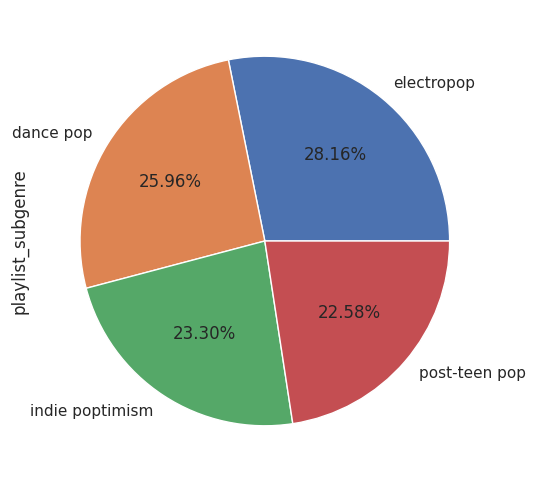

In [32]:
# Creating a visualization
fig,ax1 = plt.subplots(figsize=(6,6))

subgenre_freq.plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

**Insight**

All of the sub genres fall around similar in amount. However, the winner of subgenre is electropop with 28.16%.

#### 5. How does the audio features vary accross different subgenres?

In [33]:
# Grouping the data by genre and grabbing the mean of it's audio features
df_audio_features = df_spotify.drop(columns=['track_id','track_name','track_artist', 'track_popularity', 'track_album_id', 'track_album_name','track_album_release_date'])
df_audio_features.groupby('playlist_subgenre').agg(['mean'])

<ipython-input-33-13540e9f2d88>:3: FutureWarning: ['playlist_name', 'playlist_id', 'playlist_genre'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_audio_features.groupby('playlist_subgenre').agg(['mean'])


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
playlist_subgenre,,,,,,,,,,,,
dance pop,0.655752,0.742189,5.319723,-5.768586,0.560092,0.075837,0.144161,0.048890,0.176795,0.505211,120.106639,207832.938367
electropop,0.638609,0.723269,5.333097,-6.567401,0.563210,0.069747,0.134555,0.100840,0.182373,0.512342,122.357326,235876.772017
indie poptimism,0.634911,0.651681,5.280687,-6.830245,0.636910,0.073821,0.215198,0.058208,0.173150,0.465938,117.971858,211938.301288
post-teen pop,0.635626,0.716008,5.295837,-5.540277,0.602303,0.082358,0.153024,0.009367,0.180314,0.555087,123.850051,208598.733392


From the data we can see that most of the data falls in a similar range. A couple of characteristics that stood out are as follows.
- Indie poptimism has the lowest energy but highest acousticness
- Electropop highlights in their instrumentalness with a high liveliness
- Post teen pop has the highest speechiness and tempo  

#### 6. How does the popularity of tracks within an album vary? Are the singles always the most popular tracks?

In [34]:
# Checking the unique values of album type
df_merge['type'].value_counts()

album          579
single         573
compilation     67
Name: type, dtype: int64

As the amount of data is quite similar for album and single, we will continue to see the central tendency of the 2 album types to see.

In [35]:
# Group the data by type to check the central tendency
ct_album_type = df_merge.groupby('type').describe()['track_popularity'].reset_index()

# Dividing the data to get the rest of central tendency features
df_album = df_merge[(df_merge['type']=="album")]
df_single = df_merge[(df_merge['type']=="single")]
df_compilation = df_merge[(df_merge['type']=="compilation")]

# Grabbing the rest of central tendency & dispersion data (mode, variance, standar deviation, skew)
mode = []
std = []
var = []
skew = []

list_df = [df_album,df_single,df_compilation]

for df in list_df:
    # Grabbing the mode
    mode.append(df['track_popularity'].mode()[0])
    # Grabbing std, variance, and skew
    std.append(df['track_popularity'].std())
    var.append(df['track_popularity'].var())
    skew.append(df['track_popularity'].skew())

# Allocating the rest to ct_album_type dataframe
ct_album_type['mode'] = mode
ct_album_type['std'] = std
ct_album_type['variance'] = var
ct_album_type['skew'] = skew

# Show the result
ct_album_type

,type,count,mean,std,min,25%,50%,75%,max,mode,variance,skew
0,album,579.0,66.069085,15.262934,1.0,59.0,70.0,77.0,98.0,70,232.957157,-1.116833
1,compilation,67.0,51.895522,17.029333,4.0,39.5,55.0,65.0,88.0,63,289.998175,-0.562835
2,single,573.0,61.657941,17.147431,3.0,52.0,63.0,74.0,98.0,33,294.034374,-0.406340


From the data, we can see a couple of insights : <br>
1. The mean and median of the data for both dataframe is not that far apart. Showing a relative normalized data.
2. The average track popularity for album is actually higher than single.
3. This might be the effect of the mode of track popularity for album at 70, whereas single is at 33.
4. The album data is considered highly skewed (lower than -1) and singles as approximately symetric.

#### 7. How many songs are released per year?

In [36]:
# Create a year and month column to hold the
df_merge['month_release'] = df_merge['track_album_release_date'].dt.month

<ipython-input-36-b996e98ec454>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['month_release'] = df_merge['track_album_release_date'].dt.month


In [37]:
# Checking the updated dataframe
df_merge.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,danceability,energy,key,loudness,...,genres,folowers,popularity,total_tracks,available_markets,type,album_genres,duration_m,year_release,month_release
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,0.748,0.916,6,-2.634,...,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,3.245900,2019,6
1,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,0.675,0.919,8,-5.385,...,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,2.717483,2019,7
2,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Ed Sheeran,58,49bXZtlI5kQSqQMSCnSaWO,Cross Me (feat. Chance the Rapper & PnB Rock) ...,2019-06-21,0.679,0.923,6,-6.500,...,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,3.464900,2019,6
3,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,66,1imXAvLuowvPYIsFMYUPY0,South of the Border (feat. Camila Cabello & Ca...,2019-12-11,0.805,0.835,0,-4.603,...,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,3.137167,2019,12
4,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,65,05Bru0ZVTxp4orAyrZIA77,South of the Border (feat. Camila Cabello & Ca...,2019-10-04,0.789,0.858,5,-4.388,...,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87,1,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",single,no_genres,2.890917,2019,10


In [38]:
# Looking at the range of the year
df_merge['year_release'].describe()

count    1219.000000
mean     2014.514356
std         7.111272
min      1969.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2020.000000
Name: year_release, dtype: float64

Since the data ranges back from 1969 and those are quite not relevant data, we'll see the data from above 2000.

In [39]:
# Filtering the data
df_merge_2000 = df_merge[(df_merge['year_release'] > 2000)]

In [49]:
# Grouping the data by year of release
result_by_year = df_merge_2000.groupby(['year_release']).count()['track_name'].reset_index()
result_by_year

,year_release,track_name
0,2001,13
1,2002,8
2,2003,4
3,2004,4
4,2005,8
5,2006,6
6,2007,12
7,2008,26
8,2009,11
9,2010,55


In [51]:
# Checking the average and median
print("The average track release per year is",result_by_year['track_name'].mean())
print("The median track release per year is",result_by_year['track_name'].median(axis=0))

The average track release per year is 58.1
The median track release per year is 33.5


We can see that there is a very high skew in the data as the average and median is far apart. However, we can see that the average release per year is at ~58 tracks.

Text(0.5, 0, 'Year')

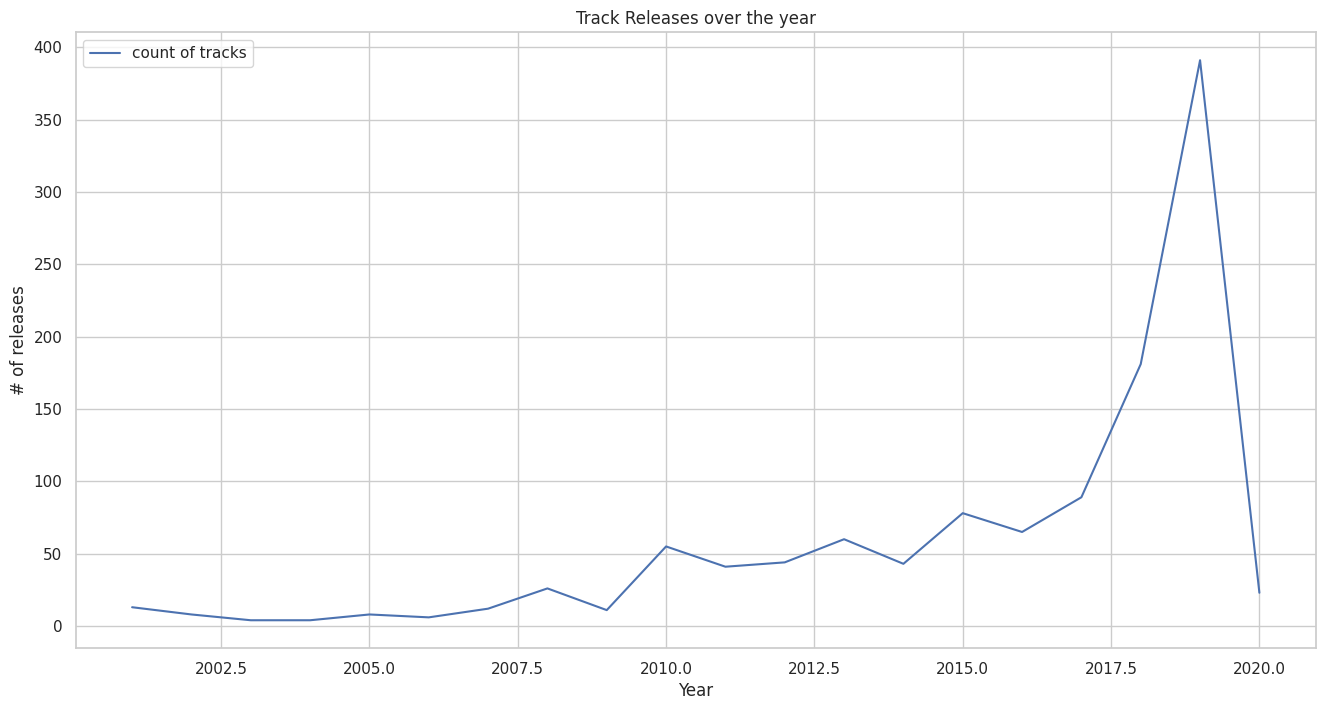

In [41]:
# Creating a figure for releases per year
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
year = df_merge_2000.groupby("year_release")['track_name'].count()
ax= sns.lineplot(x=year.index,y=year,label='count of tracks')
ax.set_title('Track Releases over the year')
ax.set_ylabel('# of releases')
ax.set_xlabel('Year')

**Insight**

From the visualization, we can see that the trend for track releases is going up as time goes by. There is a downfall at 2020, however this is possibly due to the lack of data for releases in 2020.

### External

#### 1. Does the availability of regions affect track popularity?

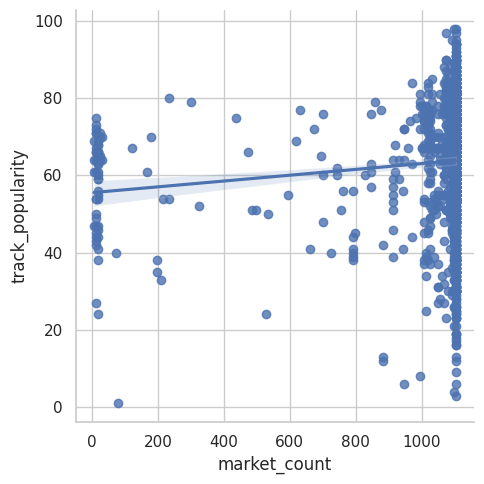

In [42]:
# Get the len of market
df_album_track = df_merge.reset_index()
# Grabbing the len of market and looping through the range of rows
market_count = []
i = 0
for i in range(len(df_album_track['available_markets'])):
    market_count.append(len(df_album_track['available_markets'][i]))
    i += 0

# Assigning the list to the column
df_album_track['market_count'] = market_count

# Checking the correlation between the amount of market penetration with track popularity
sns.lmplot(data=df_album_track,x='market_count', y='track_popularity')

In [43]:
# Checking the correlation with stats
corr_r, pval_p = stats.pearsonr(df_album_track['market_count'], df_album_track['track_popularity'])
corr_rho, pval_s = stats.spearmanr(df_album_track['market_count'], df_album_track['track_popularity'])
corr_tau, pval_k = stats.kendalltau(df_album_track['market_count'], df_album_track['track_popularity'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: 0.11, p-value: 7.383496161028042e-05
rho-correlation: 0.11, p-value: 9.2147303707373e-05
tau-correlation: 0.08, p-value: 9.653691612141377e-05


p-value used to provide information whether the correlation is real or just by chance or not significance, otherwise it is real.

If p-value more than 0.05, so the correlation between two variables is by chance.

In our case, the correlation between market penetration count and track popularity is **real** (p-value < 0.05). However, based on Spearman and Kendall correlation, the show that those variables has no correlation.

This might have been caused by :
- Most of the data has a market penetration count of 1104 or all market. Which can lead to biased data.

### Artist

#### 1. Who is the popular artist?

In [44]:
# Get the median of followers
foll_median = df_artists['folowers'].median(axis=0)
print("The median for artist followers is ", foll_median)
# Divide popular and not popular artist
non_popular = df_artists[(df_artists['folowers']<foll_median)]
popular = df_artists[(df_artists['folowers']>=foll_median)]
# Show popular artist, descending
popular = popular.sort_values(by=['folowers'], ascending=False).iloc[:10].reset_index()
popular.head()

The median for artist followers is  186356.0


,index,artist_id,artist_name,genres,folowers,popularity
0,0,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,"['pop', 'singer-songwriter pop', 'uk pop']",113025813,87
1,398,06HL4z0CvFAxyc27GXpf02,Taylor Swift,['pop'],103272304,100
2,596,06HL4z0CvFAxyc27GXpf02,Taylor Swift,['pop'],103272304,100
3,187,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,['pop'],94706745,89
4,29,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,"['art pop', 'pop']",91951445,88


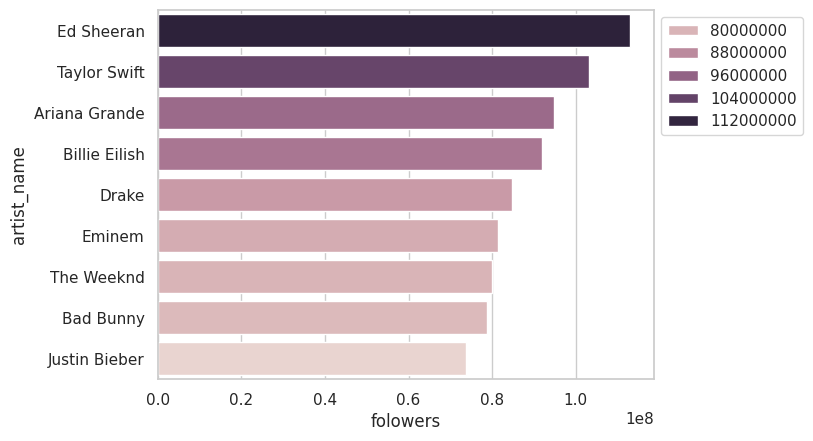

In [45]:
# Creating the visualization
sns.barplot(data=popular, x='folowers', y='artist_name', orient='h', hue='folowers')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Insight**

The artist with the most followers is Ed Sheeran at ~112.000.000 followers.

#### 2. What are the common characteristics of popular vs not so popular artists (e.g., genre, audio features of their top tracks)?

In [46]:
# Get the median of followers
foll_median = df_artists['folowers'].median(axis=0)
print("The median for artist followers is ", foll_median)

# # Divide popular and not popular artist
non_popular_merge = df_merge[(df_merge['folowers']<foll_median)].drop(columns=['track_popularity','popularity'])
popular_merge = df_merge[(df_merge['folowers']>=foll_median)].drop(columns=['track_popularity','popularity'])

# Grab their audio features means
cols = non_popular_merge.select_dtypes('number').columns
kolom = []
np_data = []
p_data = []
for col in cols:
    kolom.append(col)
    np_data.append(round(non_popular_merge[col].mean(),3))
    p_data.append(round(popular_merge[col].mean(),3))

dsd = pd.DataFrame()
dsd['kolom'] = kolom
dsd['non popular'] = np_data
dsd['popular'] = p_data
dsd['diff'] = abs(dsd['non popular'] - dsd['popular'])

dsd

The median for artist followers is  186356.0


,kolom,non popular,popular,diff
0,danceability,0.658,6.470000e-01,1.100000e-02
1,energy,0.748,7.290000e-01,1.900000e-02
2,key,5.407,5.152000e+00,2.550000e-01
3,loudness,-6.003,-5.429000e+00,5.740000e-01
4,mode,0.619,5.830000e-01,3.600000e-02
5,speechiness,0.074,8.200000e-02,8.000000e-03
6,acousticness,0.141,1.390000e-01,2.000000e-03
7,instrumentalness,0.066,2.200000e-02,4.400000e-02
8,liveness,0.171,1.840000e-01,1.300000e-02
9,valence,0.529,5.220000e-01,7.000000e-03


From the data we can see that there is hardly any difference in the music features between popular artists and non popular artists.

#### 3. How many songs are released per artist?

In [47]:
# Grouping the amount of tracks by artist
songs_per_artist = df_merge.groupby('track_artist').agg({'track_name':'count'}).reset_index()
songs_per_artist.sort_values(by=['track_name'], ascending=False)

,track_artist,track_name
273,Janelle Monáe,23
310,Katy Perry,22
320,Kygo,19
531,The Chainsmokers,16
90,Calvin Harris,16
...,...,...
231,HIRAIDAI,1
230,HAN-KUN,1
229,HAIM,1
228,Gym Class Heroes,1


The artist who has released the most tracks is Janelle Monáe at 23 tracks.

In [52]:
# Checking the average and median
print("The average track per artist is",songs_per_artist['track_name'].mean())
print("The median track per artist is",songs_per_artist['track_name'].median(axis=0))

The average track per artist is 1.978896103896104
The median track per artist is 1.0


## Conclusion
With our goal of enhancing the quality of music to increase song popularity (track popularity) and gain followers for artists by 20% by the next quarter, there are a couple of insights that we have gained as follows.
- The audio features that is dependant to track popularity are **danceability, energy, speechiness, acousticness, and instrumentalness**. With most of these features having an up trend troughtout the years.
- The most popular tracks are Circles (Post Malone) and Tusa (KAROL G) at 98 track popularity.
- All of the sub genres fall around similar in amount. However, the winner of subgenre is **electropop** with 28.16%. There are unique points of audio feature to each genre.
- The average track popularity for album is actually higher than singles. Meaning users actually also listens to side tracks other than singles.
- There is an average of 58 songs released per year.
- There is no to small correlation of market availability to track popularity.
- The most popular artist is Ed sheeran with ~112M followes.
- The correlation between popularity with the quality of music (audio features) is hardly none.


**Next Steps**

When the producers want to release a new song to a certain genre or in general, they can focus on tracking the danceability, energy, speechiness, acousticness, and instrumentalness features to boost their track popularity.
